<B>Problem Statement:</B> In 2015 Seattle created a “Vision Zero” plan to eliminate “traffic deaths and serious injuries on city streets by 2030” (City of Seattle). Vision Zero is an “international street safety movement” (City of Seattle) that aims to prevent traffic collisions through a “safe system approach” (Vision Zero Network). The city of Seattle has adopted this approach, which emphasizes several aspects of traffic safety including controlling speeding and creating safer streets. However, in the past two years since 2022 “deaths and serious injuries from traffic collisions in Seattle have been trending up” (KUOW). This indicates that the Vision Zero initiatives implemented so far are not enough. For example, Seattle has had a 25-mile-per-hour speed limit on all arterial streets since 2020, but traffic deaths have continued to rise. Speed limits and speeding are one of the leading factors in the severity of collisions (City of Seattle), but other factors including weather, vehicle count, light condition, road condition, and location could impact collision severity. While not all of these factors are under human control, understanding the bigger picture could inform initiatives like street redesigns or programs to help people take alternative modes like transit. This project will use the City of Seattle’s collision dataset to analyze these different factors.

# Set up the notebook

Import the necessary libraries.

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 
# set the plotting style 
sns.set_style("whitegrid")
!pip install geopandas


# plot tree model
import graphviz

# Plot missing values
import missingno as msno

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Train-test splits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm
from sklearn.decomposition import PCA

# Imputation
from sklearn.impute import KNNImputer
#from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# set the plotting style 
sns.set_style("whitegrid")
import geopandas as gpd
from shapely.geometry import Point, Polygon
!pip install folium
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from folium.plugins import MarkerCluster
import missingno as msno
# Logistic function
from scipy.special import expit
!pip install fancyimpute -q
from sklearn.metrics import classification_report

from fancyimpute import IterativeImputer
import missingno as msno
from scipy.stats import uniform, randint
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso, LogisticRegressionCV
import statsmodels.api as sm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
!pip install geopandas
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb

# Model metrics
from sklearn.metrics import confusion_matrix

# Logistic function
from scipy.special import expit
!pip install fancyimpute -q
from sklearn.metrics import classification_report

import missingno as msno
from scipy.stats import uniform, randint
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso, LogisticRegressionCV
import statsmodels.api as sm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Reading and Exploring Data set

In [2]:
# Mounting google drive to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
# Read dataset
crashdf = pd.read_csv('SDOT_Collisions_-_All_Years (1).csv')

Dataset is taken from the City of Seattle that includes information about crashes and weather at the time of the crash. Link for the dataset : https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::sdot-collisions-all-years/explore?location=47.641550%2C-122.345216%2C19.74&showTable=true



In [5]:
crashdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237176 entries, 0 to 237175
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                229433 non-null  float64
 1   Y                229433 non-null  float64
 2   OBJECTID         237176 non-null  int64  
 3   INCKEY           237176 non-null  int64  
 4   COLDETKEY        237176 non-null  int64  
 5   ADDRTYPE         233311 non-null  object 
 6   COLLISIONTYPE    205840 non-null  object 
 7   EXCEPTRSNCODE    116773 non-null  object 
 8   EXCEPTRSNDESC    12436 non-null   object 
 9   FATALITIES       237176 non-null  int64  
 10  INATTENTIONIND   30613 non-null   object 
 11  INCDATE          237176 non-null  object 
 12  INCDTTM          237176 non-null  object 
 13  INJURIES         237176 non-null  int64  
 14  INTKEY           78120 non-null   float64
 15  JUNCTIONTYPE     224616 non-null  object 
 16  LIGHTCOND        205519 non-null  obje

We can see that there are 39 columns in the dataset.

To learn more about the dataset, and type of data in each dataset then please visit the following link for the pdf : https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

In [6]:
# Let's see the head of the dataset and how it looks
crashdf.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,ADDRTYPE,COLLISIONTYPE,EXCEPTRSNCODE,EXCEPTRSNDESC,FATALITIES,...,SPEEDING,ST_COLCODE,ST_COLDESC,STATUS,UNDERINFL,VEHCOUNT,WEATHER,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.264594,47.523882,1,63300,63300,Block,Parked Car,NaN,NaN,0,...,NaN,32,One parked--one moving,Matched,0,2,Clear,0,0,N
1,-122.313029,47.670213,2,1194,1194,Block,Parked Car,,NaN,0,...,NaN,32,One parked--one moving,Matched,Y,2,Overcast,0,0,N
2,-122.270060,47.510992,3,46900,46900,Block,Parked Car,NaN,NaN,0,...,NaN,32,One parked--one moving,Matched,0,2,Overcast,0,0,N
3,-122.312719,47.655347,4,58300,58300,Block,Angles,NaN,NaN,0,...,Y,10,Entering at angle,Matched,0,2,Clear,0,0,N
4,-122.339439,47.565776,5,120500,120500,Intersection,Right Turn,NaN,NaN,0,...,NaN,16,From same direction - one right turn - one str...,Matched,N,2,Clear,0,0,N


In [7]:
#size of the data set 
crashdf.size

9487040

In [8]:
#number of rows 
len(crashdf.index)

237176

In [9]:
#severitycode and severitydesc value counts 
crashdf[['SEVERITYCODE','SEVERITYDESC']].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    146708
2             Injury Collision                   62746
0             Unknown                            23801
2b            Serious Injury Collision            3512
3             Fatality Collision                   408
dtype: int64

SeverityCode is the predicted value. We can see that there are 5 categories based on the severity code. 

It's interesting to know that we have one of the category as <B>Unknown</B> in the dataset.

There are very few records for the Fatality collision. It will be challenging to classify the datapoints as Fatality collision.

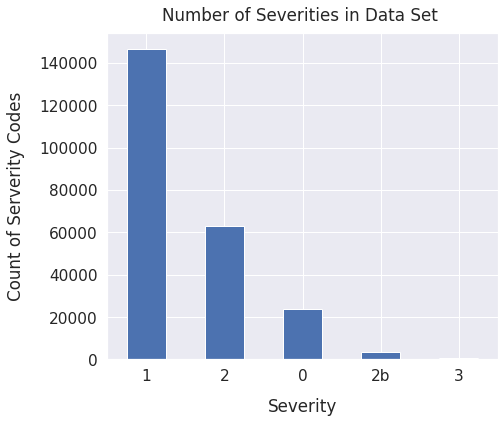

In [10]:
#visualizaiton of the number of serverities in the data set 
sns.set(font_scale=1.4)
crashdf['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Severity", labelpad=14)
plt.ylabel("Count of Serverity Codes", labelpad=14)
plt.title("Number of Severities in Data Set ", y=1.02);

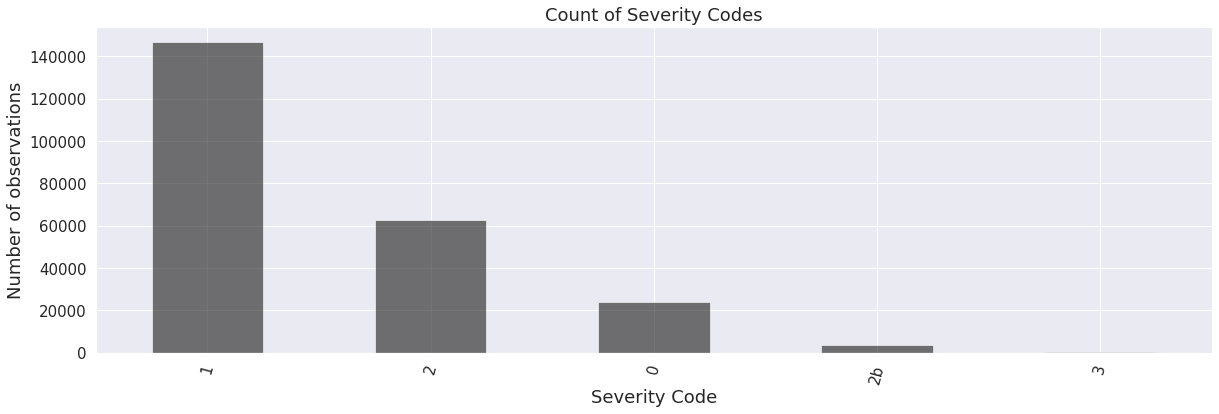

In [11]:
#number of counts for each serverity code 
crashdf['SEVERITYCODE'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Severity Code', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)
plt.title('Count of Severity Codes', fontsize = 18)
plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

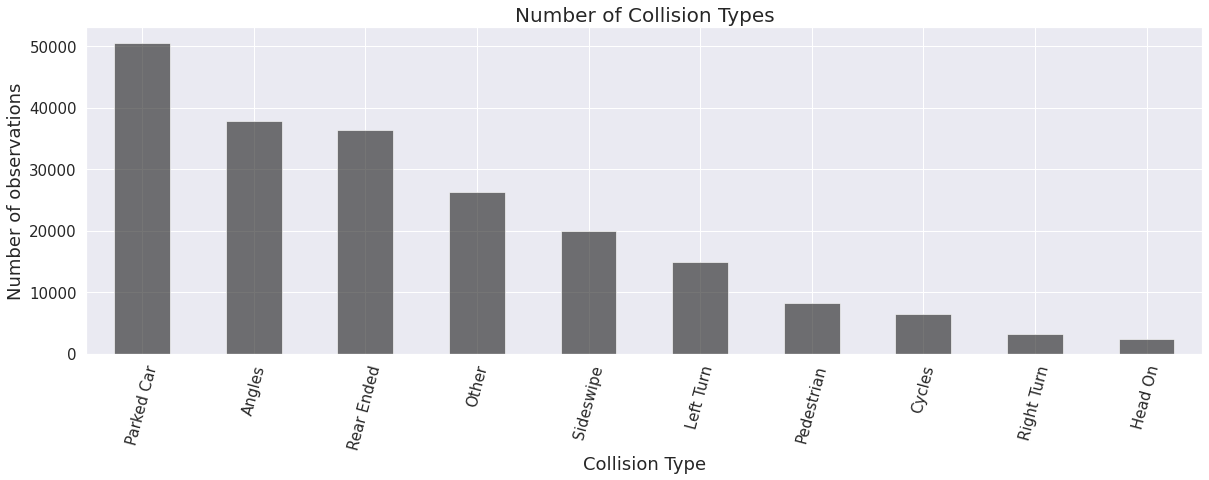

In [12]:
#number of counts for each collision type for all years 
crashdf['COLLISIONTYPE'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Collision Type', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)
plt.title('Number of Collision Types', fontsize = 20)
plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);


An angle collision occurs when one vehicle strikes another vehicle at an angle somewhere between 90 degrees (referred to as a side-impact collision) and 180 degrees (known as a rear-end collision).
Top three collisions are angles, parked car (wow..) and rear ended. 
The other category is quite big which should be considered when we are merging SENSYS data with crash data. 

In [13]:
#cleaning data by replacing nans as unknown 
crashdf['WEATHER'] = crashdf['WEATHER'].replace('Unknown', np.nan)
crashdf['ROADCOND'] = crashdf['ROADCOND'].replace('Unknown', np.nan)
crashdf['LIGHTCOND'] = crashdf['LIGHTCOND'].replace('Unknown', np.nan)

In [14]:
#deleting nas from categorical data 
cleancrash = crashdf[crashdf['WEATHER'].notna()]
cleancrash = cleancrash[cleancrash['ROADCOND'].notna()]
cleancrash = cleancrash[cleancrash['LIGHTCOND'].notna()]
cleancrash = cleancrash[cleancrash['JUNCTIONTYPE'].notna()]

##Light Condition visuals 

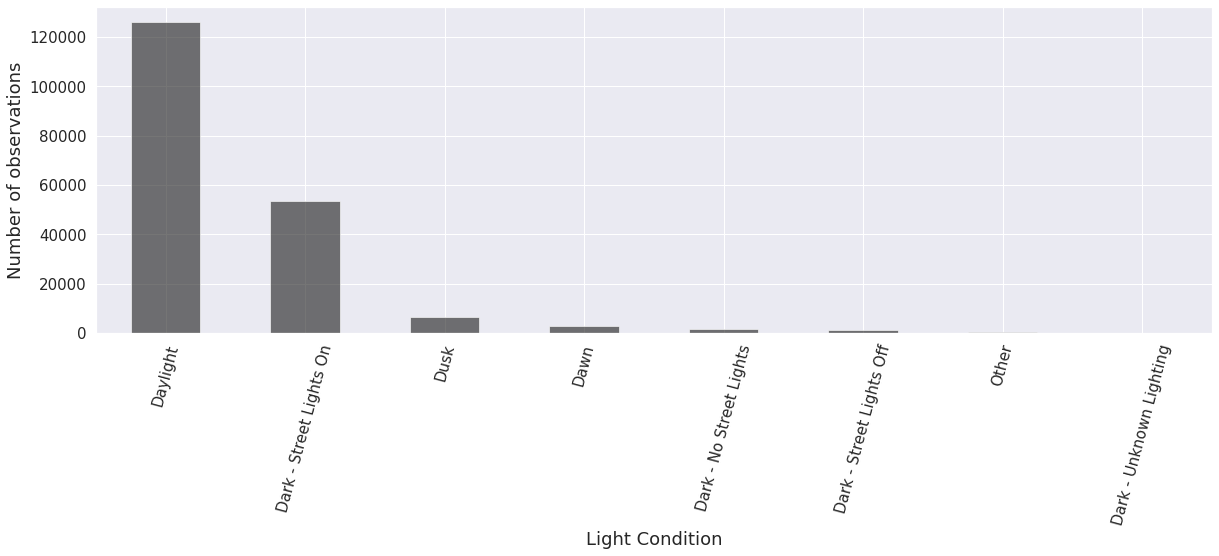

In [15]:
#count of light condition variables from the data set 
crashdf['LIGHTCOND'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Light Condition', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

We can see majority of the crashes happen in the daylight or in the dark with street lights on

In [16]:
#grouping by severity code to look at value counts 
crashdf['LIGHTCOND'].groupby(crashdf['SEVERITYCODE']).value_counts(sort=True)

SEVERITYCODE  LIGHTCOND               
0             Daylight                        2
1             Daylight                    82509
              Dark - Street Lights On     36475
              Dusk                         4230
              Dawn                         1815
              Dark - No Street Lights      1281
              Dark - Street Lights Off      924
              Other                         194
              Dark - Unknown Lighting       108
2             Daylight                    41183
              Dark - Street Lights On     15553
              Dusk                         2075
              Dawn                          890
              Dark - No Street Lights       359
              Dark - Street Lights Off      332
              Other                          61
              Dark - Unknown Lighting        47
2b            Daylight                     1956
              Dark - Street Lights On      1157
              Dusk                          117
 

## Junction Type

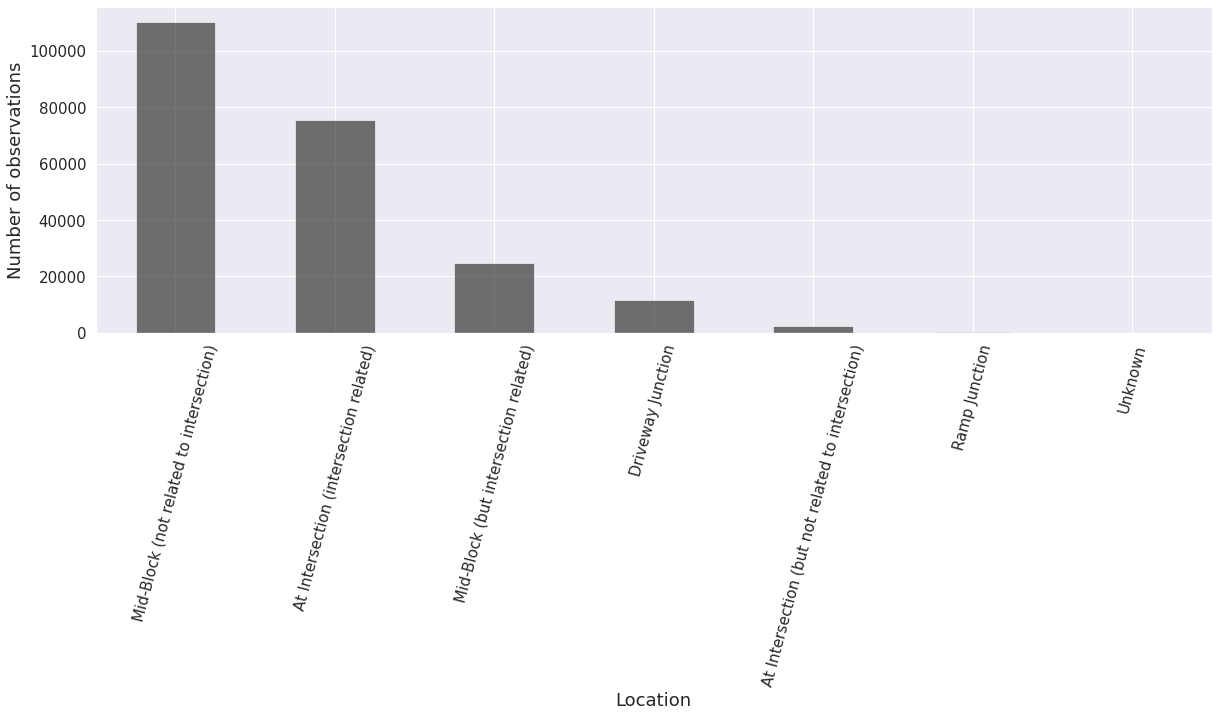

In [17]:
#counts of junction type data in data set 
crashdf['JUNCTIONTYPE'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Location', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

In [18]:
#valuecounts of junction type grouped by severity code 
crashdf['JUNCTIONTYPE'].groupby(crashdf['SEVERITYCODE']).value_counts(sort=True)

SEVERITYCODE  JUNCTIONTYPE                                     
0             Mid-Block (not related to intersection)              10879
              At Intersection (intersection related)                4465
              Mid-Block (but intersection related)                  1344
              Driveway Junction                                      648
              At Intersection (but not related to intersection)      372
              Ramp Junction                                           19
              Unknown                                                 14
1             Mid-Block (not related to intersection)              76325
              At Intersection (intersection related)               39374
              Mid-Block (but intersection related)                 15780
              Driveway Junction                                     7513
              At Intersection (but not related to intersection)     1533
              Ramp Junction                                 

## Weather visuals

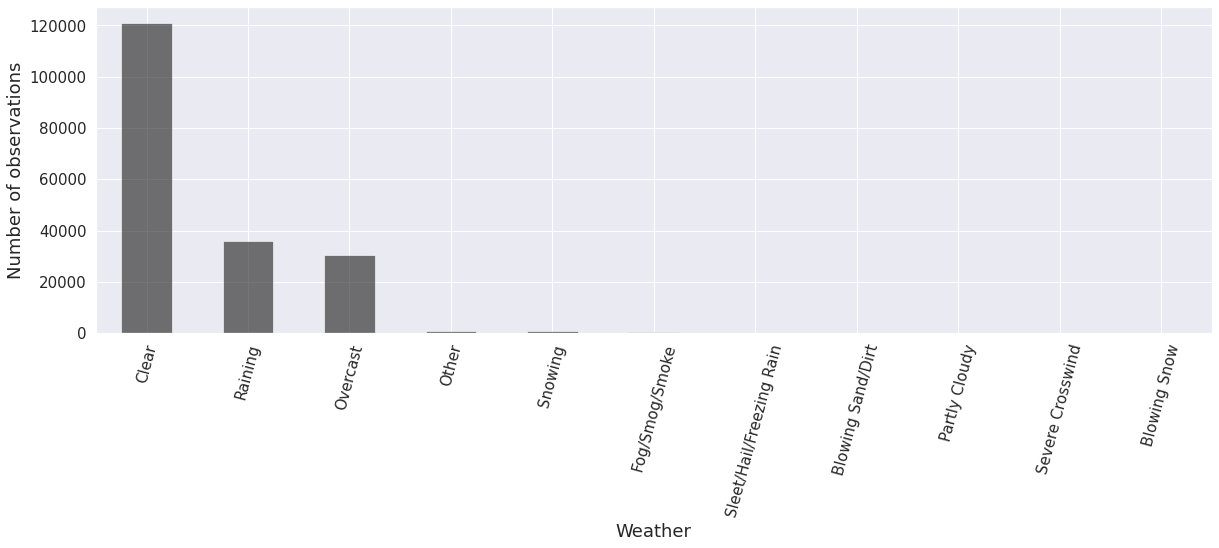

In [19]:
#count of weather in data set 
crashdf['WEATHER'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Weather', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

In [20]:
#weather grouped with severity value counts 
crashdf['WEATHER'].groupby(crashdf['SEVERITYCODE']).value_counts(sort=True)

SEVERITYCODE  WEATHER                 
0             Clear                           1
              Raining                         1
1             Clear                       80275
              Raining                     23318
              Overcast                    20528
              Other                         871
              Snowing                       803
              Fog/Smog/Smoke                449
              Sleet/Hail/Freezing Rain       93
              Blowing Sand/Dirt              42
              Severe Crosswind               21
              Partly Cloudy                  17
2             Clear                       38359
              Raining                     11882
              Overcast                     9462
              Fog/Smog/Smoke                219
              Snowing                       185
              Other                         136
              Sleet/Hail/Freezing Rain       32
              Blowing Sand/Dirt              15
 

## Cleaning Data for Visualization


In [21]:
#weather
from sklearn import preprocessing
weathercond = preprocessing.LabelEncoder()
weathercond.fit(cleancrash['WEATHER'])
cleancrash['WEATHER'] = weathercond.transform(cleancrash['WEATHER'])

In [22]:
#light
from sklearn import preprocessing
light = preprocessing.LabelEncoder()
light.fit(cleancrash['LIGHTCOND'])
cleancrash['LIGHTCOND'] = light.transform(cleancrash['LIGHTCOND'])

In [23]:
#junction type
from sklearn import preprocessing
jun = preprocessing.LabelEncoder()
jun.fit(cleancrash['JUNCTIONTYPE'])
cleancrash['JUNCTIONTYPE'] = jun.transform(cleancrash['JUNCTIONTYPE'])

In [24]:
#collision type
from sklearn import preprocessing
coll = preprocessing.LabelEncoder()
coll.fit(cleancrash['COLLISIONTYPE'])
cleancrash['COLLISIONTYPE'] = coll.transform(cleancrash['COLLISIONTYPE'])

In [25]:
#road condition 
from sklearn import preprocessing
coll = preprocessing.LabelEncoder()
coll.fit(cleancrash['ROADCOND'])
cleancrash['ROADCOND'] = coll.transform(cleancrash['ROADCOND'])

## Boxplots, Pairplotting, Heatmap & Matrix visuals



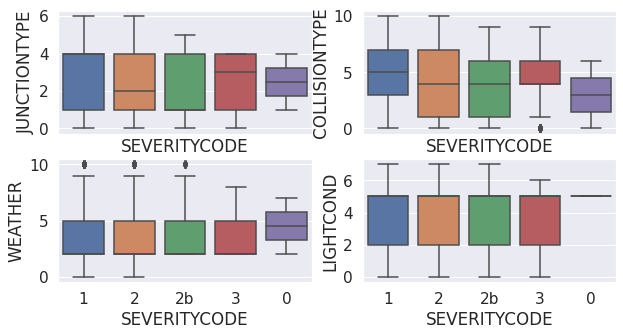

In [26]:
#boxplots of the relationship between severity code and the four categorical variables 
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.boxplot(ax=axes[0, 0], data=cleancrash, x='SEVERITYCODE', y='JUNCTIONTYPE')
sns.boxplot(ax=axes[0, 1], data=cleancrash, x='SEVERITYCODE', y='COLLISIONTYPE')
sns.boxplot(ax=axes[1, 0], data=cleancrash, x='SEVERITYCODE', y='WEATHER')
sns.boxplot(ax=axes[1, 1], data=cleancrash, x='SEVERITYCODE', y='LIGHTCOND')

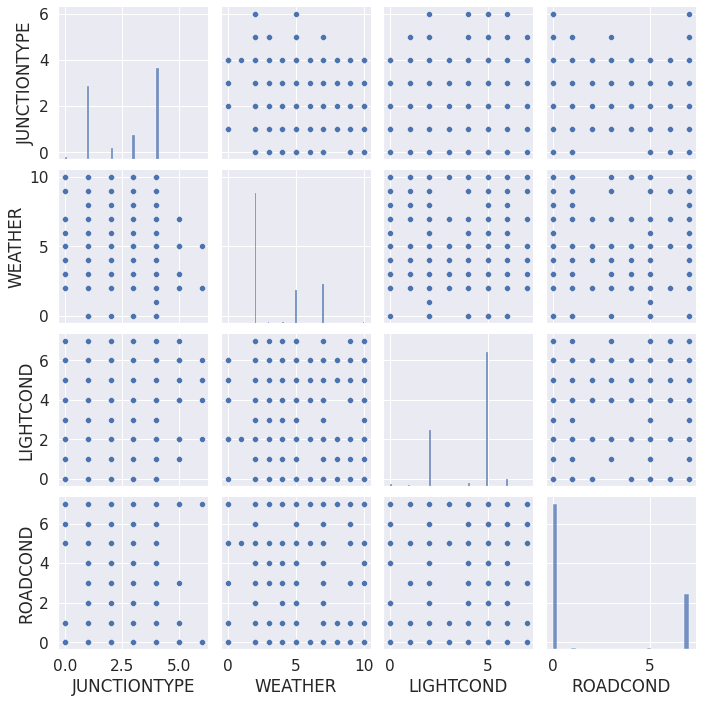

In [27]:
#pairplots of categorical data with severity code
sns.pairplot(cleancrash[['SEVERITYCODE','JUNCTIONTYPE','WEATHER','LIGHTCOND','ROADCOND']])

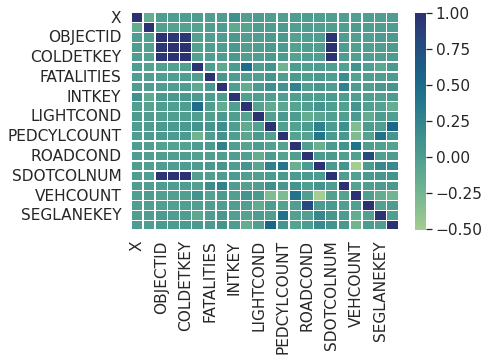

In [28]:
#heatmap of data 
sns.heatmap(cleancrash.corr(), cmap="crest",linewidth=.5)

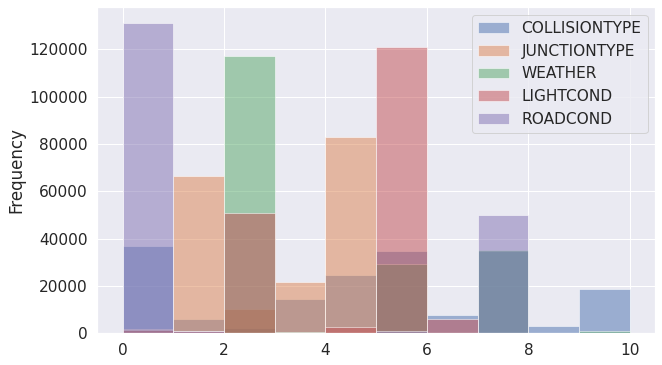

In [29]:
#frequency of categorical variables with severity code
cleancrash[['SEVERITYCODE','COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND','ROADCOND']].plot(kind='hist', figsize=(10,6), alpha=0.5, stacked=False)

In [30]:
#sns.pairplot(data = cleancrash, hue = 'SEVERITYCODE')

## Map

In [31]:
# This will take time to run. Hence we have commented the code.
'''map = folium.Map(location=[47.6062, -122.3321], zoom_start=10, control_scale=True)
marker_cluster = MarkerCluster().add_to(map)
for index,location_info in crashdf.iterrows():
  try:
    folium.Marker([location_info['Y'], location_info['X']],icon = folium.Icon()).add_to(marker_cluster)
  except:
    continue
map'''

"map = folium.Map(location=[47.6062, -122.3321], zoom_start=10, control_scale=True)\nmarker_cluster = MarkerCluster().add_to(map)\nfor index,location_info in crashdf.iterrows():\n  try:\n    folium.Marker([location_info['Y'], location_info['X']],icon = folium.Icon()).add_to(marker_cluster)\n  except:\n    continue\nmap"

# Checking for null values + data cleaning

Let's check the percentage of missing values in each column of the dataset

In [32]:
(crashdf.isna().sum()/crashdf.shape[0])*100

X                   3.264664
Y                   3.264664
OBJECTID            0.000000
INCKEY              0.000000
COLDETKEY           0.000000
ADDRTYPE            1.629592
COLLISIONTYPE      13.212129
EXCEPTRSNCODE      50.765254
EXCEPTRSNDESC      94.756636
FATALITIES          0.000000
INATTENTIONIND     87.092708
INCDATE             0.000000
INCDTTM             0.000000
INJURIES            0.000000
INTKEY             67.062435
JUNCTIONTYPE        5.295645
LIGHTCOND          19.133049
LOCATION            2.014538
PEDCOUNT            0.000000
PEDCYLCOUNT         0.000000
PEDROWNOTGRNT      97.688636
PERSONCOUNT         0.000000
REPORTNO            0.000000
ROADCOND           19.749890
SDOT_COLCODE        0.000422
SDOT_COLDESC        0.000422
SDOTCOLNUM         46.366833
SERIOUSINJURIES     0.000000
SEVERITYCODE        0.000422
SEVERITYDESC        0.000000
SPEEDING           95.497437
ST_COLCODE          3.967939
ST_COLDESC         13.212129
STATUS              0.000000
UNDERINFL     

We can see that there are missing values in some of the columns: 
We will analyse each column and see how to impute the value or discard those records.


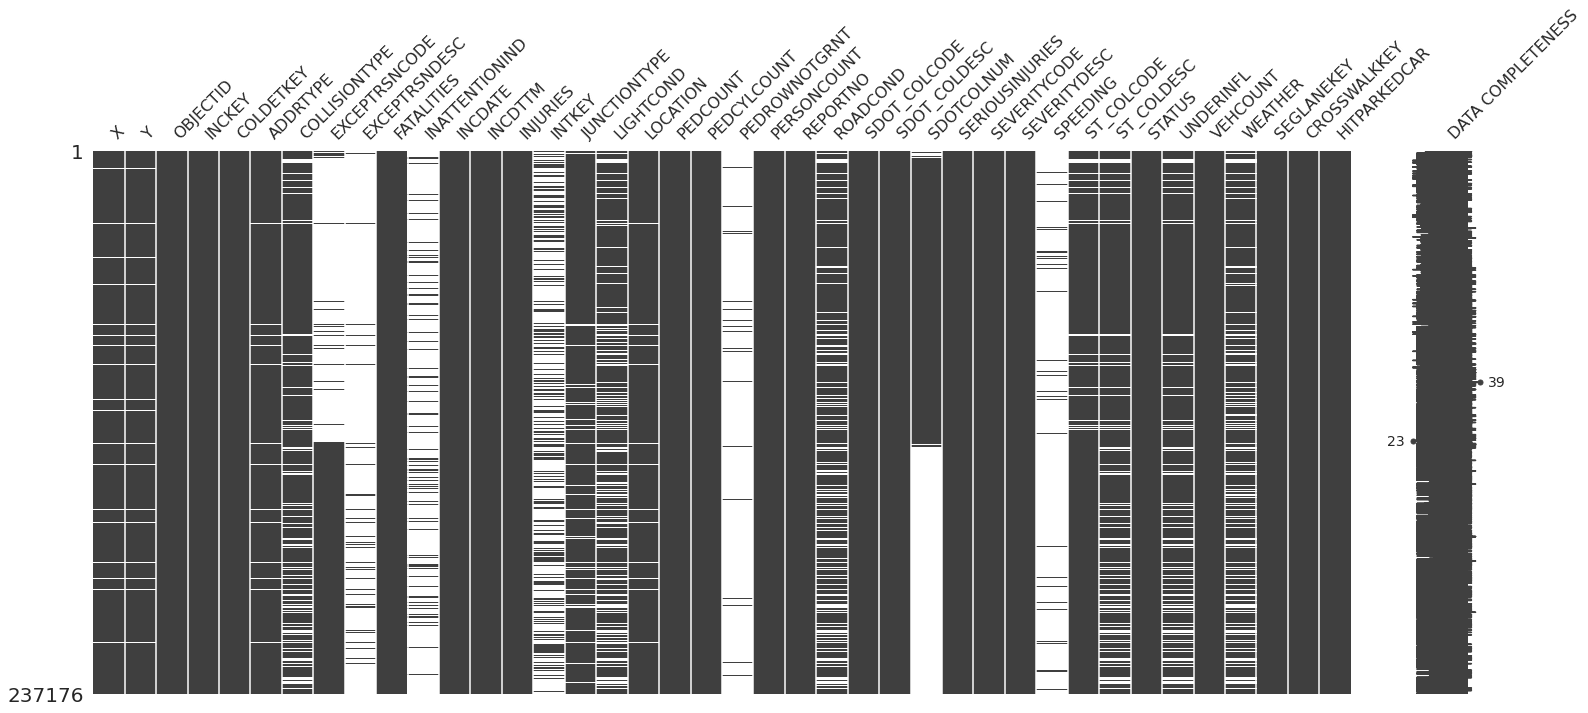

In [33]:
msno.matrix(crashdf, labels = True);

There's a evident pattern in how the values are missing for the dataset. It means that the values are not missing at random. 

Specifically, We can see that there's relationship between how the values are missing for 'COLLISIONTYPE','LIGHTCOND','ROADCOND','ST_COLCODE','WEATHER'

In [34]:
crashdf[crashdf['COLLISIONTYPE'].isna()][['COLLISIONTYPE','LIGHTCOND','ROADCOND','ST_COLCODE','WEATHER']]

,COLLISIONTYPE,LIGHTCOND,ROADCOND,ST_COLCODE,WEATHER
5,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,,NaN
38,NaN,NaN,NaN,,NaN
...,...,...,...,...,...
237148,NaN,NaN,NaN,,NaN
237151,NaN,NaN,NaN,,NaN
237154,NaN,NaN,NaN,,NaN
237162,NaN,NaN,NaN,,NaN


Even if we select the subset of records we can see that the values are missing for each of these records. 

<B>Interesting Observation:</B>

For most of the records the above values are missing where the output category is missing. We can be smart about how to impute the value in these records. 

<I> One approach :</I> We can impute the missing values with missing as a value name and see how the model performs. 

Let's see if there's any relation between the output category and the X and Y columns

We can see that the X and Y values are missing for the same data point. 

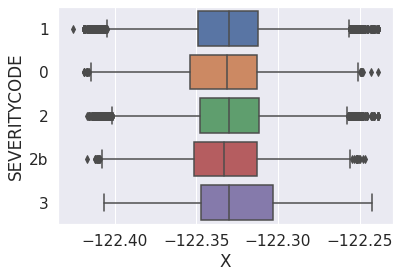

In [35]:
sns.boxplot(data = crashdf,x = crashdf['X'],y = crashdf['SEVERITYCODE'])

We can see that most of the data is overlapping for each of the category. But let's plot the histogram and see if it's actually making sense to have X and Y column in the dataset.

<Figure size 2160x2160 with 0 Axes>

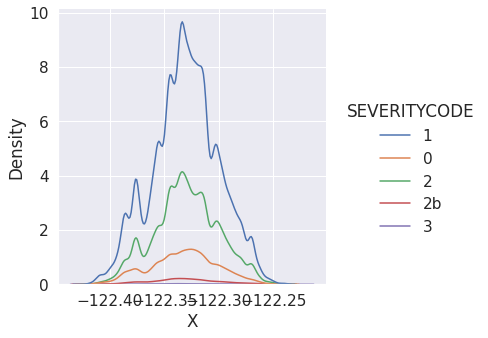

In [36]:
plt.figure(figsize=(30,30))
sns.displot(crashdf, x="X", hue="SEVERITYCODE", kind="kde")


Based on the above graph we can see that we can't segregate the output labed based on the X or Y variable.



Delete the columns which we don't want to use
* X : We can't segregate the output label based on the X or Y variable
*Y : We can't segregate the output label based on the X or Y variable
*OBJECTID : Unique number to identify the incident
*INCKEY : Unqiue Incident key
*COLDETKEY : Unique Collision key
*EXCEPTRSNDESC : Description of the EXCEPTRNCODE ( Repetitive Information)
*SEVERITYDESC : Description of the SEVERITYCODE( Repetitive Information )
*INCDATE : Incidient Date ( We are going to use the INCDTIME variable which contains the same information)
*REPORTNO : Unique number
*SDOT_COLDESC : Description of the SDOT_COLCODE ( Repetitive Information)
*SDOTCOLNUM : A number given to the collision by SDOT. 
*ST_COLDESC : A description that corresponds to the state’s
coding designation. 
*INTKEY : Key that corresponds to the intersection
associated with a collision 
*LOCATION : Description of the general location of the
collision 




In [37]:
# Delete the above columns from the dataset
crashdf = crashdf[crashdf.columns.difference(['OBJECTID','INCKEY','COLDETKEY','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','REPORTNO','SDOT_COLDESC','SDOTCOLNUM','SDOTCOLNUM','X','Y','ST_COLDESC','INTKEY','LOCATION','INJURIES','SERIOUSINJURIES'])]

We can see that in the EXCEPTRNSCODE we don't have value in the 104337. 
The NEI in the 

In [38]:
crashdf.columns

Index(['ADDRTYPE', 'COLLISIONTYPE', 'CROSSWALKKEY', 'EXCEPTRSNCODE',
       'FATALITIES', 'HITPARKEDCAR', 'INATTENTIONIND', 'INCDTTM',
       'JUNCTIONTYPE', 'LIGHTCOND', 'PEDCOUNT', 'PEDCYLCOUNT', 'PEDROWNOTGRNT',
       'PERSONCOUNT', 'ROADCOND', 'SDOT_COLCODE', 'SEGLANEKEY', 'SEVERITYCODE',
       'SPEEDING', 'STATUS', 'ST_COLCODE', 'UNDERINFL', 'VEHCOUNT', 'WEATHER'],
      dtype='object')

The NEI in the dataset : Not Enough Information, or Insufficient Location Information

Hence, We can replace it with 0 if NEI is 0 and 1 otherwise

In [39]:
#EXCEPTRSNCODE, INATTENTIONIND,UNDERINFL, PEDROWNOTGRNT,SPEEDING: Replace with 0 or 1 in the dataset
crashdf['EXCEPTRSNCODE'].value_counts()

       104337
NEI     12436
Name: EXCEPTRSNCODE, dtype: int64

In [40]:
crashdf['EXCEPTRSNCODE'] = np.where(crashdf['EXCEPTRSNCODE']!='NEI',0,1)
crashdf['EXCEPTRSNCODE'].value_counts()

<ipython-input-40-0c0ac5a4f4f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashdf['EXCEPTRSNCODE'] = np.where(crashdf['EXCEPTRSNCODE']!='NEI',0,1)


0    224740
1     12436
Name: EXCEPTRSNCODE, dtype: int64

We can see that SPEEDING is a cateogrical variable. If speeding is factor in the collision then it's marked as Y in the dataset else it's blank.

We will replace it with the 1 and 0 based on the value in the dataset.

Y -- 1

Blank -- 0

In [41]:
crashdf['SPEEDING'].value_counts()

Y    10679
Name: SPEEDING, dtype: int64

In [42]:
crashdf['SPEEDING'] = np.where(crashdf['SPEEDING']=='Y',1,0)

In [43]:
crashdf['SPEEDING'].value_counts()

0    226497
1     10679
Name: SPEEDING, dtype: int64

PEDROWNOTGRNT: Whether or not the pedestrian right of way was
not granted. (Y/N) 

If it's Y in the dataset then we are replacing it with 1 else 0

In [44]:
crashdf['PEDROWNOTGRNT'].value_counts()

Y    5482
Name: PEDROWNOTGRNT, dtype: int64

In [45]:
crashdf['PEDROWNOTGRNT'] = np.where(crashdf['PEDROWNOTGRNT']=='Y',1,0)

In [46]:
crashdf['PEDROWNOTGRNT'].value_counts()

0    231694
1      5482
Name: PEDROWNOTGRNT, dtype: int64

INATTENTIONIND: Whether or not collision was due to inattention.
(Y/N) 

Y --- 1

N --- 0

In [47]:
crashdf['INATTENTIONIND'].value_counts()

Y    30613
Name: INATTENTIONIND, dtype: int64

In [48]:
crashdf['INATTENTIONIND'] = np.where(crashdf['INATTENTIONIND']=='Y',1,0)

HITPARKEDCAR is also a categorical variable: Whether or not the collision involved hitting a
parked car. (Y/N) 

Y --- 1

N --- 0

In [49]:
crashdf['HITPARKEDCAR'].value_counts()

N    221561
Y     15615
Name: HITPARKEDCAR, dtype: int64

In [50]:
crashdf['HITPARKEDCAR'] = np.where(crashdf['HITPARKEDCAR']=='Y',1,0)

In [51]:
crashdf['HITPARKEDCAR'].value_counts()

0    221561
1     15615
Name: HITPARKEDCAR, dtype: int64

Whether or not a driver involved was under the
influence of drugs or alcohol. 

Y --- 1

N --- 0

In [52]:
crashdf['UNDERINFL'].value_counts()

N    114479
0     81646
Y      5505
1      4230
Name: UNDERINFL, dtype: int64

In [53]:
crashdf['UNDERINFL'] = np.where((crashdf['UNDERINFL']=='Y') | (crashdf['UNDERINFL']=='1'),  1,0)

In [54]:
crashdf['UNDERINFL'].value_counts()

0    227441
1      9735
Name: UNDERINFL, dtype: int64

Now, We have to deal with the missing values for ADDRTYPE , COLLISIONTYPE, INTKEY,JUNCTIONTYPE,LIGTHCOND, LOCATION,ROADCOND,SDOT_COLCODE,ST_COLCODE,ST_COLCODE,WEATHER

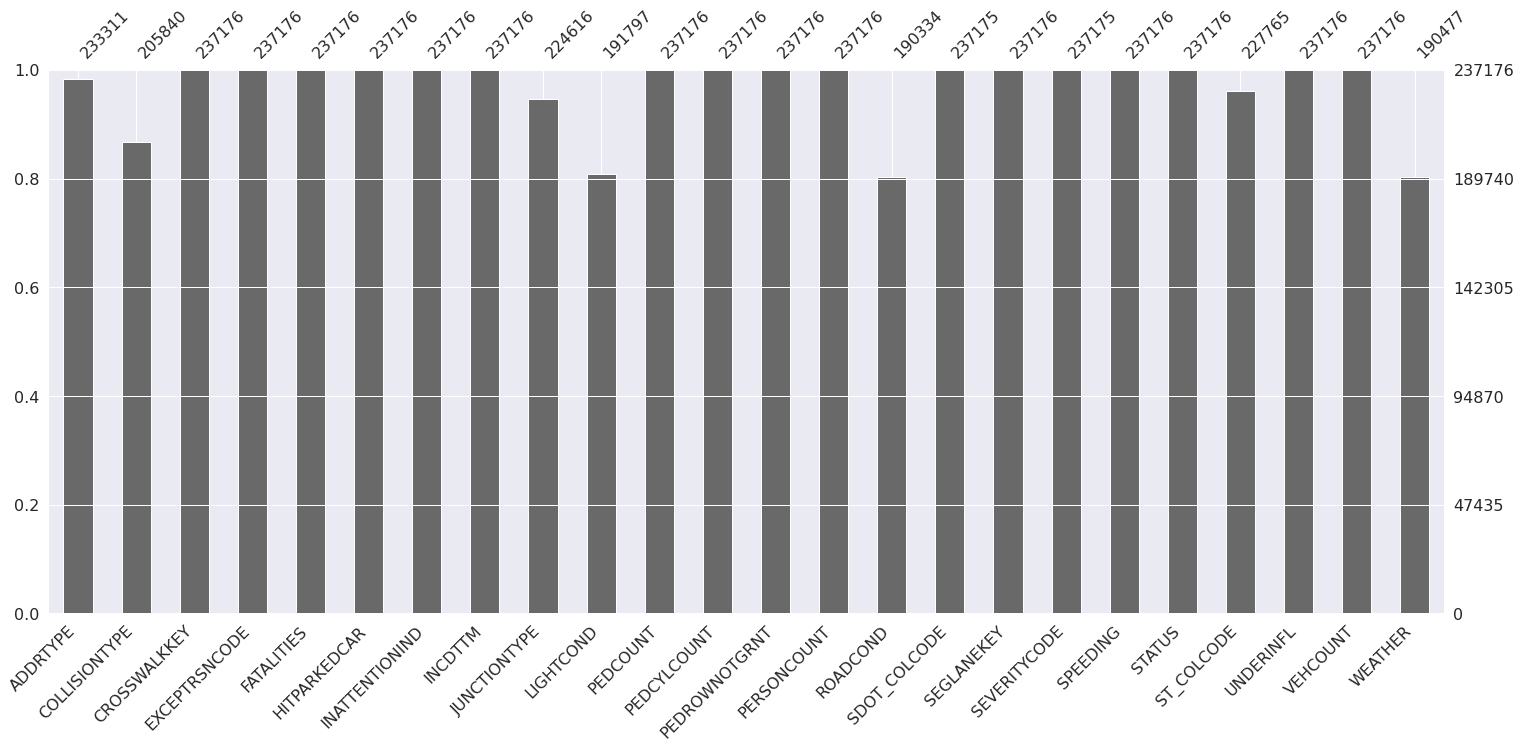

In [55]:
msno.bar(crashdf)

As mentioned earleir, There's a pattern on how the values are missing for these fields. We will be replacing the missing values with the value as 'Missing'

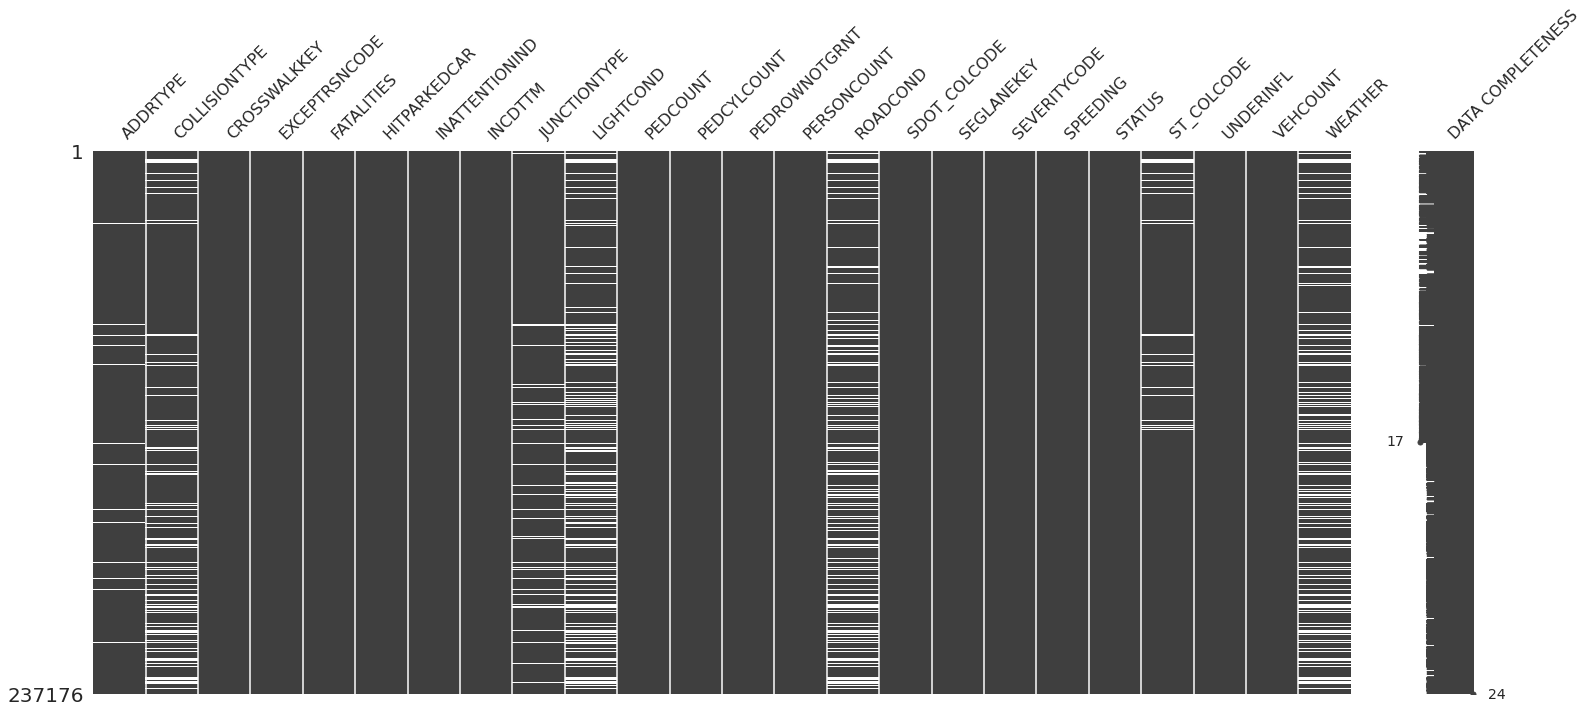

In [56]:
msno.matrix(crashdf, labels = True);

We can replace all the missing value for 'COLLISIONTYPE','LIGHTCOND','ROADCOND','ST_COLCODE','WEATHER' as Missing because there is reason behind it.

In [57]:
col = [ 'COLLISIONTYPE','LIGHTCOND','ROADCOND','WEATHER'  ]
for c in col:
  crashdf[col] = crashdf[col].fillna('Missing')

In [58]:
crashdf['ST_COLCODE'] = crashdf['ST_COLCODE'].fillna(0)

In [59]:
crashdf['ST_COLCODE'].replace(' ',0,inplace = True)

In [60]:
crashdf['ST_COLCODE'] = crashdf['ST_COLCODE'].astype('int')

In [61]:
(crashdf.isna().sum()/crashdf.shape[0])*100

ADDRTYPE          1.629592
COLLISIONTYPE     0.000000
CROSSWALKKEY      0.000000
EXCEPTRSNCODE     0.000000
FATALITIES        0.000000
HITPARKEDCAR      0.000000
INATTENTIONIND    0.000000
INCDTTM           0.000000
JUNCTIONTYPE      5.295645
LIGHTCOND         0.000000
PEDCOUNT          0.000000
PEDCYLCOUNT       0.000000
PEDROWNOTGRNT     0.000000
PERSONCOUNT       0.000000
ROADCOND          0.000000
SDOT_COLCODE      0.000422
SEGLANEKEY        0.000000
SEVERITYCODE      0.000422
SPEEDING          0.000000
STATUS            0.000000
ST_COLCODE        0.000000
UNDERINFL         0.000000
VEHCOUNT          0.000000
WEATHER           0.000000
dtype: float64

In [62]:
# We can delete this record from the dataset since we don't have the severity code
crashdf['SEVERITYCODE'].isna().sum()

1

In [63]:
crashdf.dropna(subset = ['SEVERITYCODE'], inplace = True, how = 'all')
# We didn't see the pattern in how the values are missing for ADDRTYPE and JUNCTIONTYPE hence, we are going to replace it with the mode
crashdf['ADDRTYPE'].fillna(crashdf['ADDRTYPE'].mode()[0] ,inplace = True)
crashdf['JUNCTIONTYPE'].fillna(crashdf['JUNCTIONTYPE'].mode()[0] ,inplace = True)
#crashdf['LOCATION'].fillna(crashdf['LOCATION'].mode()[0] ,inplace = True)

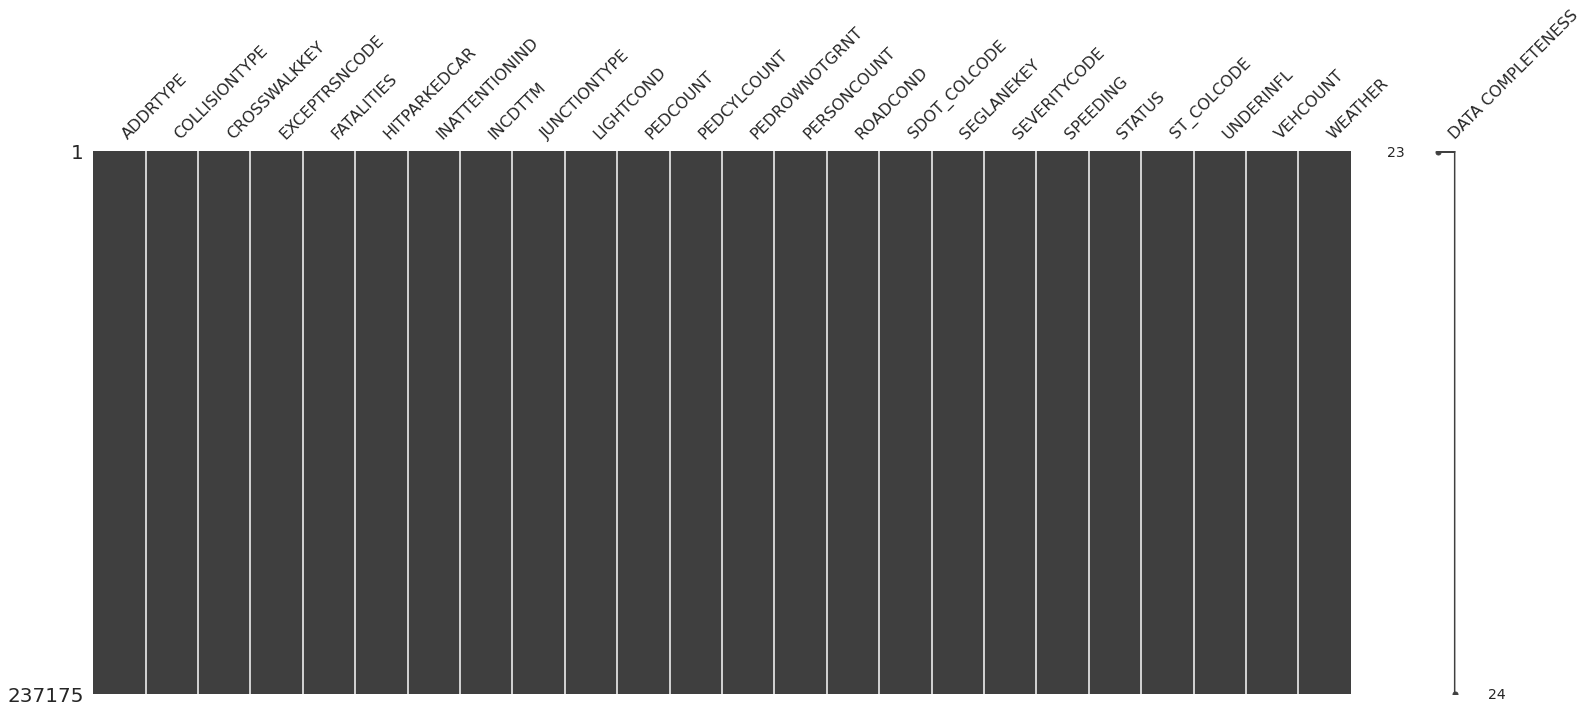

In [64]:
msno.matrix(crashdf, labels = True);

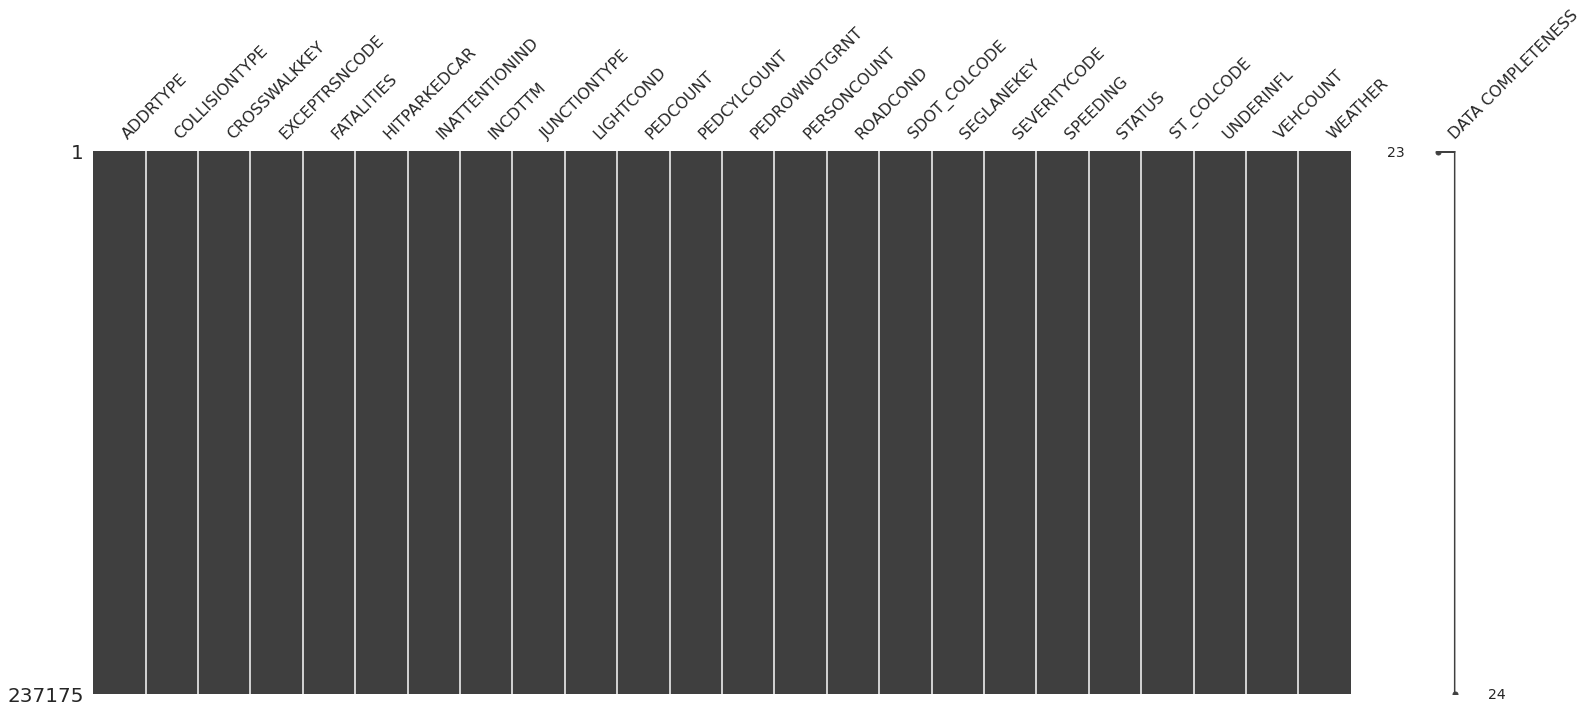

In [65]:
msno.matrix(crashdf, labels = True);

In [66]:
crashdf['STATUS'].value_counts()

Matched      205912
Unmatched     31263
Name: STATUS, dtype: int64

In [67]:
# We can see that the INCDTTM contains time and Date of the incident
crashdf['INCDTTM']

0          8/11/2006 4:12:00 PM
1          3/31/2013 1:01:00 AM
2                      5/8/2005
3          2/14/2006 1:46:00 PM
4          12/5/2011 2:30:00 PM
                  ...          
237171    1/24/2020 12:18:00 PM
237172      1/4/2020 7:41:00 AM
237173    12/14/2019 1:45:00 AM
237174     8/31/2019 3:54:00 PM
237175      2/7/2020 9:55:00 AM
Name: INCDTTM, Length: 237175, dtype: object

In [68]:
crashdf['INCDTTM'] = pd.to_datetime(crashdf['INCDTTM'])
# Let's fetch year,month,week,day, hour and day of the week from the date time column
crashdf['INCDTTM_year'] = crashdf['INCDTTM'].dt.year
crashdf['INCDTTM_month'] = crashdf['INCDTTM'].dt.month
crashdf['INCDTTM_week'] = crashdf['INCDTTM'].dt.week
crashdf['INCDTTM_day'] = crashdf['INCDTTM'].dt.day
crashdf['INCDTTM_hour'] = crashdf['INCDTTM'].dt.hour
crashdf['INCDTTM_dayofweek'] = crashdf['INCDTTM'].dt.dayofweek

<ipython-input-68-330eb7851f19>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  crashdf['INCDTTM_week'] = crashdf['INCDTTM'].dt.week


In [69]:
crashdf.drop('INCDTTM',inplace = True,axis = 1)

In [70]:
crashdf.head()

,ADDRTYPE,COLLISIONTYPE,CROSSWALKKEY,EXCEPTRSNCODE,FATALITIES,HITPARKEDCAR,INATTENTIONIND,JUNCTIONTYPE,LIGHTCOND,PEDCOUNT,...,ST_COLCODE,UNDERINFL,VEHCOUNT,WEATHER,INCDTTM_year,INCDTTM_month,INCDTTM_week,INCDTTM_day,INCDTTM_hour,INCDTTM_dayofweek
0,Block,Parked Car,0,0,0,0,0,Mid-Block (not related to intersection),Daylight,0,...,32,0,2,Clear,2006,8,32,11,16,4
1,Block,Parked Car,0,0,0,0,0,Mid-Block (not related to intersection),Dark - Street Lights On,0,...,32,1,2,Overcast,2013,3,13,31,1,6
2,Block,Parked Car,0,0,0,0,0,Mid-Block (not related to intersection),Daylight,0,...,32,0,2,Overcast,2005,5,18,8,0,6
3,Block,Angles,0,0,0,0,0,Mid-Block (but intersection related),Daylight,0,...,10,0,2,Clear,2006,2,7,14,13,1
4,Intersection,Right Turn,0,0,0,0,1,At Intersection (intersection related),Daylight,0,...,16,0,2,Clear,2011,12,49,5,14,0


# Encoding Data with clean data set 


In [71]:
#function to convert categorical variable into one hot encoded values
def onehotencoding(df, col_name):
    dummy = pd.get_dummies(df[[col_name]])
    res = pd.concat([df, dummy ], axis=1)
    res.drop(col_name,inplace = True,axis = 1)
    return(res)

In [72]:
cat_variables = ['ADDRTYPE','COLLISIONTYPE', 'EXCEPTRSNCODE','JUNCTIONTYPE','LIGHTCOND'
                  ,'ROADCOND','STATUS','WEATHER']
for col in cat_variables:
  crashdf = onehotencoding(crashdf,col)

In [73]:
crashdf.columns

Index(['CROSSWALKKEY', 'FATALITIES', 'HITPARKEDCAR', 'INATTENTIONIND',
       'PEDCOUNT', 'PEDCYLCOUNT', 'PEDROWNOTGRNT', 'PERSONCOUNT',
       'SDOT_COLCODE', 'SEGLANEKEY', 'SEVERITYCODE', 'SPEEDING', 'ST_COLCODE',
       'UNDERINFL', 'VEHCOUNT', 'INCDTTM_year', 'INCDTTM_month',
       'INCDTTM_week', 'INCDTTM_day', 'INCDTTM_hour', 'INCDTTM_dayofweek',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Missing',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTY

In [74]:
crashdf = crashdf[crashdf.columns.difference(['FATALITIES','HITPARKEDCAR'])]

In [75]:
crashdf.dropna(inplace = True)

# PCA

In [76]:
X = crashdf[crashdf.columns.difference(['SEVERITYCODE'])]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237174 entries, 0 to 237175
Data columns (total 71 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   ADDRTYPE_Alley                                                  237174 non-null  uint8  
 1   ADDRTYPE_Block                                                  237174 non-null  uint8  
 2   ADDRTYPE_Intersection                                           237174 non-null  uint8  
 3   COLLISIONTYPE_Angles                                            237174 non-null  uint8  
 4   COLLISIONTYPE_Cycles                                            237174 non-null  uint8  
 5   COLLISIONTYPE_Head On                                           237174 non-null  uint8  
 6   COLLISIONTYPE_Left Turn                                         237174 non-null  uint8  
 7   COLLISIONTYPE_Missing                 

In [77]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [78]:
pca = PCA().fit(X_scaled)

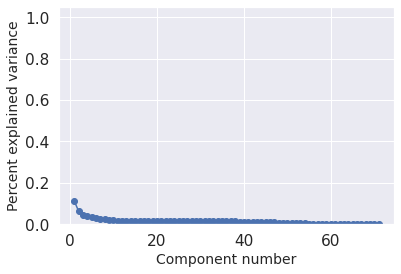

In [79]:
plt.plot(range(1,X_scaled.shape[1]+1), pca.explained_variance_ratio_,'o-')
plt.ylim(0,1.05)
plt.xlabel('Component number', fontsize = 14)
plt.ylabel('Percent explained variance', fontsize = 14);

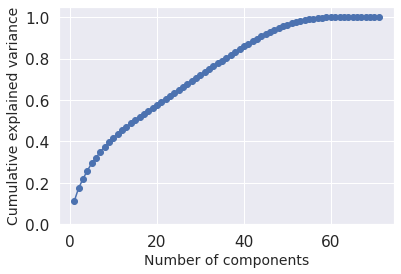

In [80]:
plt.plot(range(1,X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_),'o-')
plt.ylim(0,1.05)
plt.xlabel('Number of components', fontsize = 14)
plt.ylabel('Cumulative explained variance', fontsize = 14);

In [81]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11244379, 0.1754145 , 0.21867939, 0.25969097, 0.29396961,
       0.32204274, 0.34980859, 0.37450881, 0.39707247, 0.41796994,
       0.43614304, 0.45331811, 0.47036751, 0.48696587, 0.50299118,
       0.51834837, 0.5334383 , 0.54848284, 0.56334976, 0.57805041,
       0.59266205, 0.6072227 , 0.62170482, 0.63608829, 0.6503764 ,
       0.66456587, 0.6787043 , 0.69282601, 0.70691904, 0.72099928,
       0.73507506, 0.74911348, 0.76312217, 0.77701909, 0.79090138,
       0.80474166, 0.81844354, 0.83199454, 0.84543216, 0.85866149,
       0.87177917, 0.8843547 , 0.89635247, 0.90782682, 0.91888967,
       0.92927688, 0.93916453, 0.94776521, 0.95571157, 0.96322815,
       0.97043999, 0.97607755, 0.98167385, 0.98709182, 0.99086762,
       0.99369798, 0.99594594, 0.99787405, 0.99870423, 0.99942561,
       0.99975992, 0.9999023 , 0.99997022, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Component Reduction

In [82]:
pca = PCA(n_components = 2).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

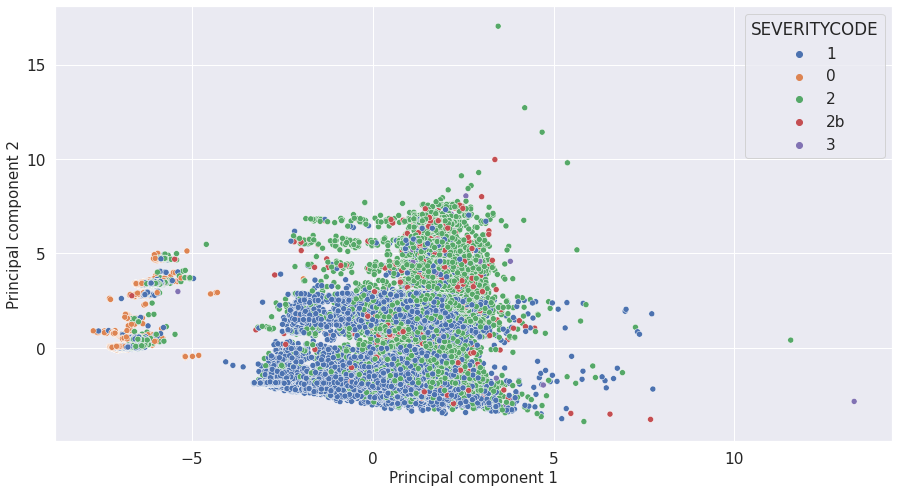

In [83]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = X_reduced[:,0], y = X_reduced[:,1], hue = crashdf['SEVERITYCODE'])
plt.xlabel('Principal component 1', fontsize = 15)
plt.ylabel('Principal component 2', fontsize = 15);

# Train Test Split

In [84]:
X = crashdf[crashdf.columns.difference(['SEVERITYCODE'])]
y = crashdf['SEVERITYCODE']

In [85]:
X.isna().any().any()

False

In [86]:
y.isna().any().any()
y= y.replace('2b', 4)
y = y.astype(int)
y.value_counts()

1    146708
2     62746
0     23800
4      3512
3       408
Name: SEVERITYCODE, dtype: int64

In [87]:
crashdf.columns

Index(['ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Missing',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe', 'CROSSWALKKEY',
       'INATTENTIONIND', 'INCDTTM_day', 'INCDTTM_dayofweek', 'INCDTTM_hour',
       'INCDTTM_month', 'INCDTTM_week', 'INCDTTM_year',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGH

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [89]:
y_test.isna().any().any()

False

In [90]:
y_test.value_counts()

1    29342
2    12549
0     4760
4      702
3       82
Name: SEVERITYCODE, dtype: int64

In [91]:
#Scaled Data
scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test[:100])

# Model

In [92]:
class_names = ['0','1','2','3','4']

In [93]:
def classification_sensitivity(decision_matrix):
    return decision_matrix[1,1]/(np.sum(decision_matrix[1,:]))

In [94]:
def classification_specificity(decision_matrix):
    return decision_matrix[0,0]/(np.sum(decision_matrix[0,:]))

## Logistic Regression

We use a logistic regression using an L1 norm weighted penalty function using the liblinear solver

In [95]:
model_lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [96]:
pred_lr = model_lr.predict(X_test)

In [97]:
mat_lr = confusion_matrix(y_test, pred_lr)

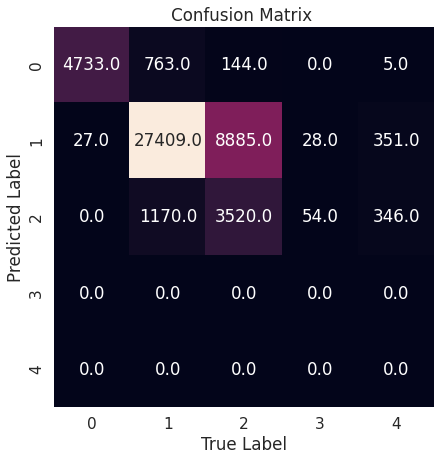

In [98]:
plt.figure(20,figsize=(10,7))
sns.heatmap(mat_lr.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names,fmt=".1f")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix ');

In [99]:
print(classification_report(y_test, pred_lr, target_names=class_names))
print('Specificity of the logistic regression model',classification_specificity(mat_lr))
print('Sensitivity of the logistic regression model',classification_sensitivity(mat_lr))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4760
           1       0.75      0.93      0.83     29342
           2       0.69      0.28      0.40     12549
           3       0.00      0.00      0.00        82
           4       0.00      0.00      0.00       702

    accuracy                           0.75     47435
   macro avg       0.46      0.44      0.43     47435
weighted avg       0.73      0.75      0.71     47435

Specificity of the logistic regression model 0.994327731092437
Sensitivity of the logistic regression model 0.9341217367595938


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
mean_squared_error(y_test, pred_lr, squared = False).round(3)

0.585

Compute the mean absolute error

In [101]:
mean_absolute_error(y_test, pred_lr).round(3)

0.274

## Looking at Model Coefficients

We first load the coefficeints from our model into a Pandas Dataframe in order to better view the impact of our model parameters

In [102]:
coefs = model_lr.coef_
featurenames = model_lr.feature_names_in_
fitclasses = model_lr.classes_
fitdf = pd.DataFrame(data = coefs.T, index = featurenames, columns = fitclasses)
pd.set_option('display.max_rows', 73) #Optional, this lets us see the whole df
print(fitclasses)

[0 1 2 3 4]


Then we display the coefficients sorted by each of our outputs. Large positive values correspond to a higher probability of a crash being positively classified in the category, and a large negative value corresponds to a crash being negativley classified in that category.

In [103]:
fitdf.sort_values(by = 0).head()[0]

PERSONCOUNT                                           -2.517795
VEHCOUNT                                              -2.235211
ADDRTYPE_Alley                                        -0.681784
ROADCOND_Dry                                          -0.529795
JUNCTIONTYPE_At Intersection (intersection related)   -0.457852
Name: 0, dtype: float64

In [104]:
fitdf.sort_values(by = 0).tail()[0]

STATUS_Matched                                          1.107433
JUNCTIONTYPE_Mid-Block (not related to intersection)    1.329966
ROADCOND_Missing                                        1.387935
JUNCTIONTYPE_Unknown                                    1.726598
STATUS_Unmatched                                        2.642051
Name: 0, dtype: float64

In [105]:
fitdf.sort_values(by = 1).head()[1]

PEDCOUNT                -2.948746
COLLISIONTYPE_Missing   -2.781392
PEDCYLCOUNT             -2.248110
STATUS_Unmatched        -1.414415
WEATHER_Blowing Snow    -1.413635
Name: 1, dtype: float64

In [106]:
fitdf.sort_values(by = 1).tail()[1]

ROADCOND_Missing            0.800687
COLLISIONTYPE_Right Turn    1.034952
ADDRTYPE_Alley              1.085080
COLLISIONTYPE_Sideswipe     1.621181
COLLISIONTYPE_Parked Car    2.517343
Name: 1, dtype: float64

In [107]:
fitdf.sort_values(by = 2).head()[2]

COLLISIONTYPE_Parked Car             -1.840900
LIGHTCOND_Missing                    -1.161327
COLLISIONTYPE_Sideswipe              -1.137363
LIGHTCOND_Dark - No Street Lights    -0.743682
LIGHTCOND_Dark - Street Lights Off   -0.713675
Name: 2, dtype: float64

In [108]:
fitdf.sort_values(by = 2).tail()[2]

PEDCOUNT                    0.706383
WEATHER_Partly Cloudy       0.786015
PEDCYLCOUNT                 0.884151
COLLISIONTYPE_Pedestrian    1.102304
COLLISIONTYPE_Cycles        1.112385
Name: 2, dtype: float64

In [109]:
fitdf.sort_values(by = 4).head()[4]

COLLISIONTYPE_Parked Car   -1.830218
COLLISIONTYPE_Sideswipe    -1.354550
COLLISIONTYPE_Rear Ended   -1.015767
ADDRTYPE_Alley             -0.911429
WEATHER_Fog/Smog/Smoke     -0.763260
Name: 4, dtype: float64

In [110]:
fitdf.sort_values(by = 4).tail()[4]

JUNCTIONTYPE_Ramp Junction    0.773245
COLLISIONTYPE_Head On         0.897949
SPEEDING                      1.009887
PEDCYLCOUNT                   1.102979
COLLISIONTYPE_Pedestrian      1.577603
Name: 4, dtype: float64

In [111]:
fitdf.sort_values(by = 3).head()[3]

COLLISIONTYPE_Parked Car         -1.806447
STATUS_Matched                   -1.433588
COLLISIONTYPE_Rear Ended         -1.286058
INATTENTIONIND                   -0.864637
JUNCTIONTYPE_Driveway Junction   -0.594060
Name: 3, dtype: float64

In [112]:
fitdf.sort_values(by = 3).tail()[3]

COLLISIONTYPE_Head On       1.324481
WEATHER_Other               1.345025
SPEEDING                    1.646849
ROADCOND_Dry                2.219072
COLLISIONTYPE_Pedestrian    2.431735
Name: 3, dtype: float64

## Random Forest Model

We explore the various parameters of a Random Forrest Classifier to find optimal parameters to fit our dataset

In [113]:
'''rf_model = RandomForestClassifier()

params = {
    "n_estimators": randint(75, 150),
    "max_depth": randint(0, 10),
    "min_samples_leaf": randint(0, 10), 
    "min_samples_split": randint(2, 5) 
}

search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)'''

#search.best_params_

'rf_model = RandomForestClassifier()\n\nparams = {\n    "n_estimators": randint(75, 150),\n    "max_depth": randint(0, 10),\n    "min_samples_leaf": randint(0, 10), \n    "min_samples_split": randint(2, 5) \n}\n\nsearch = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)\n\nsearch.fit(X_train, y_train)'

We then use these in our Random Forrest Classifier

In [114]:
model_rf = RandomForestClassifier(n_estimators = 93, min_samples_leaf = 1, min_samples_split = 2, max_depth = 9)

In [115]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=93)

In [116]:
pred_rf = model_rf.predict(X_test)

In [117]:
mat_rf = confusion_matrix(y_test, pred_rf)

In [118]:
#class_names = ['1','2','2b','3']

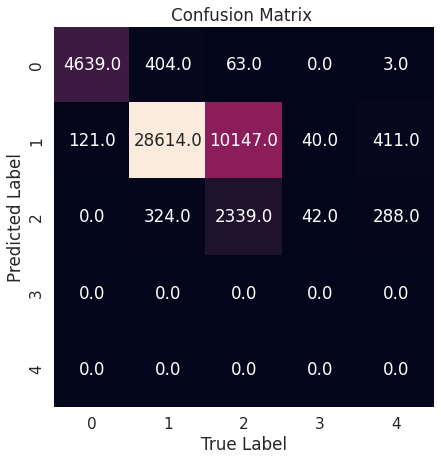

In [119]:
plt.figure(20,figsize=(10,7))
sns.heatmap(mat_rf.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names,fmt=".1f")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix ');

In [120]:
print(classification_report(y_test, pred_rf, target_names=class_names))
print('Specificity of the random forest model',classification_specificity(mat_rf))
print('Sensitivity of the random forest model',classification_sensitivity(mat_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4760
           1       0.73      0.98      0.83     29342
           2       0.78      0.19      0.30     12549
           3       0.00      0.00      0.00        82
           4       0.00      0.00      0.00       702

    accuracy                           0.75     47435
   macro avg       0.48      0.43      0.41     47435
weighted avg       0.75      0.75      0.69     47435

Specificity of the random forest model 0.9745798319327731
Sensitivity of the random forest model 0.975189148660623


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
mean_squared_error(y_test, pred_rf, squared = False).round(3)

0.587

Compute the mean absolute error

In [122]:
mean_absolute_error(y_test, pred_rf).round(3)

0.275

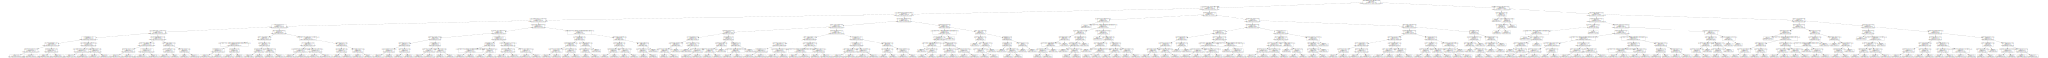

In [123]:
tree_data = tree.export_graphviz(model_rf.estimators_[0], out_file=None, feature_names=X.columns) 
graph = graphviz.Source(tree_data) 
graph

In [124]:
model_rf.feature_importances_

array([1.34121836e-04, 9.19646228e-03, 6.54385555e-03, 2.52734798e-03,
       2.10565003e-02, 4.46966900e-04, 6.17331150e-04, 5.29092049e-02,
       6.38458195e-03, 6.85958956e-02, 2.48069125e-02, 1.26922852e-02,
       5.87361822e-04, 1.24757625e-02, 4.88595782e-03, 8.94775743e-04,
       1.16529230e-03, 7.91073983e-04, 2.19295558e-02, 1.09995840e-03,
       1.57274007e-03, 1.56384489e-02, 1.16244706e-04, 8.48126102e-03,
       6.48588984e-04, 6.57257252e-04, 1.05764476e-02, 2.14524595e-05,
       1.04076882e-05, 5.90753139e-05, 5.83014992e-05, 6.21366965e-04,
       1.53245842e-05, 6.76197386e-05, 6.02549357e-03, 7.77126822e-05,
       4.38618762e-02, 1.04186898e-05, 2.91913664e-02, 2.33464812e-02,
       1.01611168e-02, 1.41455418e-01, 4.19050673e-03, 5.14095802e-05,
       2.76366372e-02, 1.35240507e-05, 8.56085807e-06, 7.77742033e-06,
       3.84571166e-05, 1.70369731e-05, 6.36079095e-04, 2.91719328e-02,
       6.41257831e-03, 1.12142583e-03, 8.63836319e-02, 9.79035110e-02,
      